In [72]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import wordcloud as wc
df1 = pd.read_csv('wine1.csv')
df2 = pd.read_csv('wine2.csv')



Populating the interactive namespace from numpy and matplotlib


In [13]:
frames = [df1,df2]

df = pd.concat(frames, sort = True)
df["province country"] = df["province"] + ", " + df["country"]

df[0:10]


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,province country
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,NaN,NaN,NaN,Cabernet Sauvignon,Heitz,"California, US"
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Bodega Carmen Rodríguez,"Northern Spain, Spain"
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,NaN,NaN,NaN,Sauvignon Blanc,Macauley,"California, US"
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,NaN,NaN,NaN,Pinot Noir,Ponzi,"Oregon, US"
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,NaN,NaN,NaN,Provence red blend,Domaine de la Bégude,"Provence, France"
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Numanthia,"Northern Spain, Spain"
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Maurodos,"Northern Spain, Spain"
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Bodega Carmen Rodríguez,"Northern Spain, Spain"
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,NaN,NaN,NaN,Pinot Noir,Bergström,"Oregon, US"
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,NaN,NaN,NaN,Pinot Noir,Blue Farm,"California, US"


In [4]:
#best/worst average by country


avg_country = df[["country","points"]].groupby("country").agg(["count","mean"])
avg_country.columns = ['Count', "Mean"]
avg_country = avg_country[avg_country["Count"] > 200]
avg_country.sort_values(by= "Mean", ascending = False)[0:5] #best
#avg_country.sort_values(by= "Mean", ascending = True)[0:5] #worst

,Count,Mean
country,,
Austria,6402,89.707591
Germany,4617,89.200996
France,43191,88.884559
Canada,453,88.880795
Italy,43018,88.481147


In [90]:
#best average by province
avg_region = df[["province country","points"]].groupby(["province country"]).agg(["count","mean"])

avg_region.columns = ['Count', "Mean"]
avg_region = avg_region[avg_region["Count"] > 200]

avg_region.sort_values(by="Mean", ascending = False)[0:5] #best

avg_region.sort_values(by="Mean", ascending = True)[0:5] #worst



,Count,Mean
province country,,
"Central Valley, Chile",884,84.830317
"Central Spain, Spain",1228,84.906352
"Australia Other, Australia",798,85.030075
"Virginia, US",1292,85.415635
"Curicó Valley, Chile",564,85.608156


In [91]:
#best average by varietal
avg_varietal = df[["variety","points"]].groupby(["variety"]).agg(["count",'mean'])

avg_varietal.columns = ['Count', "Mean"]
avg_varietal = avg_varietal[avg_varietal["Count"] > 200]


avg_varietal.sort_values(by="Mean", ascending = False)[0:5] #best
#avg_varietal.sort_values(by="Mean", ascending = True)[0:5] #worst



,Count,Mean
variety,,
Sangiovese Grosso,2097,90.387220
Nebbiolo,5045,90.353419
Champagne Blend,2634,89.822703
Blaufränkisch,459,89.684096
Grüner Veltliner,2387,89.656054


In [68]:
#best/worst bang per buck per country
df["BPB Score"] = df["points"]/df["price"]

bbp_country = df[["country","BPB Score"]].groupby("country").agg(["count","mean"])
bbp_country.columns = ['Count', "Mean"]

bbp_country2 = bbp_country[bbp_country["Count"] > 200]
bbp_country2.sort_values(by= "Mean", ascending = False)[0:5] #best
#bbp_country2.sort_values(by= "Mean", ascending = True)[0:5] #worst

,Count,Mean
country,,
Romania,259,8.249066
Bulgaria,218,7.488149
Chile,10182,5.938419
Argentina,9343,5.611222
Portugal,9051,5.554613


In [29]:
#per price range 
df["Price Range"] = pd.qcut(df["price"], 5,labels=['3.99 - 15.00', '15.01 - 20.00', '20.01 - 30.00',
                                        '30.01 - 45.00', '45.01 - 3300.00'] )

price_range = df[["Price Range", "points"]].groupby("Price Range").agg(["count","max"])
price_range.columns = ["Count", "Max"]

df[0:10]

price_range

,Count,Max
Price Range,,
3.99 - 15.00,58995,94
15.01 - 20.00,46161,96
20.01 - 30.00,56849,96
30.01 - 45.00,45072,99
45.01 - 3300.00,51133,100


In [60]:
#$3.99 - $15
first_group = df[df["Price Range"] == "3.99 - 15.00"]
first_group[["price","variety","winery","province country"]][first_group["points"] == 94]

,price,variety,winery,province country
140179,15.0,Pedro Ximénez,Sanchez Romate,"Andalucia, Spain"
19136,14.0,Sherry,Osborne,"Andalucia, Spain"
23974,13.0,Portuguese Red,Quinta dos Murças,"Douro, Portugal"


In [62]:
#15-20
second_group = df[df["Price Range"] == "15.01 - 20.00"]
second_group[['price',"variety","winery","province country"]][second_group["points"] == 96].drop_duplicates("winery")

,price,variety,winery,province country
56971,20.0,Syrah,Rulo,"Washington, US"


In [47]:
#20-30
third_group = df[df["Price Range"] == "20.01 - 30.00"]
third_group[["price","variety","winery","province country"]][third_group["points"] == 96].drop_duplicates("winery")

,price,variety,winery,province country
10541,27.0,Red Blend,Isole e Olena,"Tuscany, Italy"
65333,28.0,Chardonnay,Fess Parker,"California, US"
81970,30.0,Chardonnay,Efeste,"Washington, US"
9901,29.0,Riesling,Domaines Schlumberger,"Alsace, France"
45992,28.0,Bordeaux-style White Blend,Château Filhot,"Bordeaux, France"
54253,27.0,Grenache,Donkey & Goat,"California, US"
54311,28.0,Riesling,Eichinger,"Kamptal, Austria"
102489,27.0,Chardonnay,The Eyrie Vineyards,"Oregon, US"
109845,30.0,Pinot Noir,Sineann,"Oregon, US"
119658,30.0,Pedro Ximénez,Alvear,"Andalucia, Spain"


In [50]:
#30-45
fourth_group = df[df["Price Range"] == "30.01 - 45.00"]
fourth_group[["price","variety","winery","province country"]][fourth_group["points"] == 99]

,price,variety,winery,province country
118059,44.0,Chardonnay,Failla,"California, US"


In [53]:
#45-3300

fifth_group = df[df["Price Range"] == "45.01 - 3300.00"]
fifth_group[["price","variety","winery","province country"]][fifth_group["points"] == 100].drop_duplicates("winery").sort_values(by = "price")

,price,variety,winery,province country
19354,65.0,Syrah,Cayuse,"Oregon, US"
113929,80.0,Syrah,Charles Smith,"Washington, US"
98647,100.0,Pinot Noir,Williams Selyem,"California, US"
58352,150.0,Bordeaux-style Red Blend,Château Léoville Barton,"Bordeaux, France"
28954,195.0,Red Blend,Giovanni Chiappini,"Tuscany, Italy"
89399,200.0,Cabernet Sauvignon,Cardinale,"California, US"
111087,210.0,Prugnolo Gentile,Avignonesi,"Tuscany, Italy"
92916,215.0,Cabernet Sauvignon,Shafer,"California, US"
114272,245.0,Cabernet Blend,Sloan,"California, US"
89728,250.0,Champagne Blend,Louis Roederer,"Champagne, France"


In [58]:
#simple stats

print("Price Mean: " + str(df["price"].mean()))
print("Price Max: " + str(df["price"].max()))
print("Price Min: " + str(df["price"].min()))
print("Score Mean: " + str(df["points"].mean()))
print("Score Max: " + str(df["points"].max()))
print("Score Min: " + str(df["points"].min()))


Price Mean: 34.1771619999
Price Max: 3300.0
Price Min: 4.0
Score Mean: 88.1469343292
Score Max: 100
Score Min: 80


In [96]:
varietal = df[["description","price"]][df["variety"] == 'Grüner Veltliner']

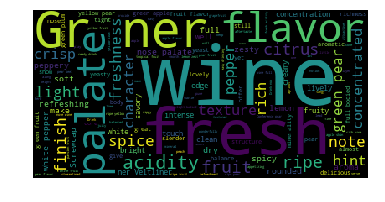

In [97]:
wordcloud2 = wc.WordCloud().generate(' '.join(varietal['description']))

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
import statsmodels.api as sm
from patsy import dmatrices


# Regression
# Step 1: Create design matrices
y, X = dmatrices('price ~ points', data=frames, return_type='dataframe')

#Step 2: Run the Regression
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()
